In [64]:
# Считываю данные
import pandas as pd
df = pd.read_csv('click_stream3.csv', names = ['id', 'type', 'date', 'device', 'gender'])
df

,id,type,date,device,gender
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female
...,...,...,...,...,...
142077,397473,4_payment_confirmation_page,2015-01-12,Mobile,Female
142078,860829,4_payment_confirmation_page,2015-02-07,Mobile,Female
142079,371291,4_payment_confirmation_page,2015-02-17,Mobile,Female
142080,263707,4_payment_confirmation_page,2015-03-20,Mobile,Female


In [65]:
# Убираю из даты дни чтобы можно было вести статистику по месяцам
df.date = df.date.map(lambda x: x[:-3])
df

,id,type,date,device,gender
0,313593,1_home_page,2015-02,Desktop,Female
1,468315,1_home_page,2015-02,Desktop,Male
2,264005,1_home_page,2015-03,Desktop,Female
3,290784,1_home_page,2015-03,Desktop,Male
4,639104,1_home_page,2015-01,Desktop,Female
...,...,...,...,...,...
142077,397473,4_payment_confirmation_page,2015-01,Mobile,Female
142078,860829,4_payment_confirmation_page,2015-02,Mobile,Female
142079,371291,4_payment_confirmation_page,2015-02,Mobile,Female
142080,263707,4_payment_confirmation_page,2015-03,Mobile,Female


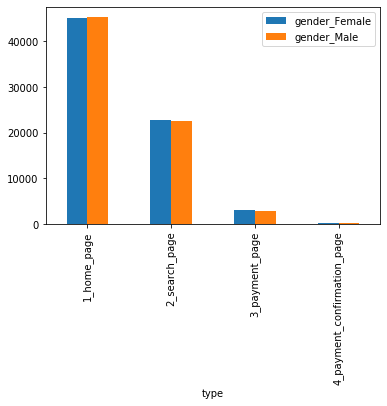

In [66]:
# Применяю one-hot-incoding по столбцу с полом пользователя для удобного отображения
# Убираю колонку 'id'
# Группирую получившийся DataFrame по типу нахождения на странице
# И нахожу количество людей определённого пола
# Отображаю столбцами получившиеся данные
pd.get_dummies(df,columns=['gender']).drop('id', axis = 1) \
    .groupby(['type']).agg('sum').plot(kind = 'bar')
# Можно заметить что пол сильно не влияет на посещаемость сайта и другие действия

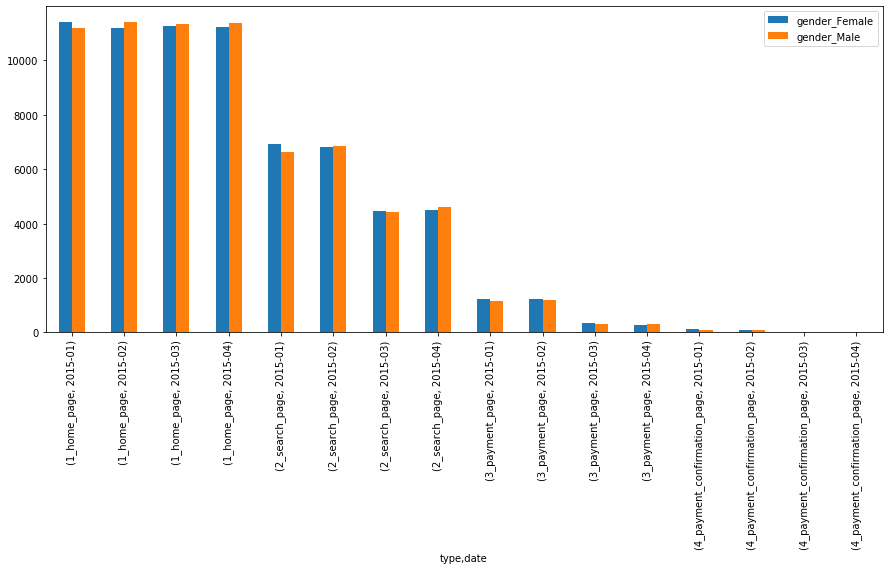

In [67]:
# Делаю всё то же что и в прошлом блоке но для каждого месяца
pd.get_dummies(df, columns=['gender']).drop('id', axis = 1) \
    .groupby(['type', 'date']).agg('sum').plot(kind = 'bar', figsize = (15, 6))
# Здесь тоже видно, что пол не влияет на посещаемость сайта по месяцам
# Но видно что поиск на сайте упал по обоим полам начиная с третьего месяца